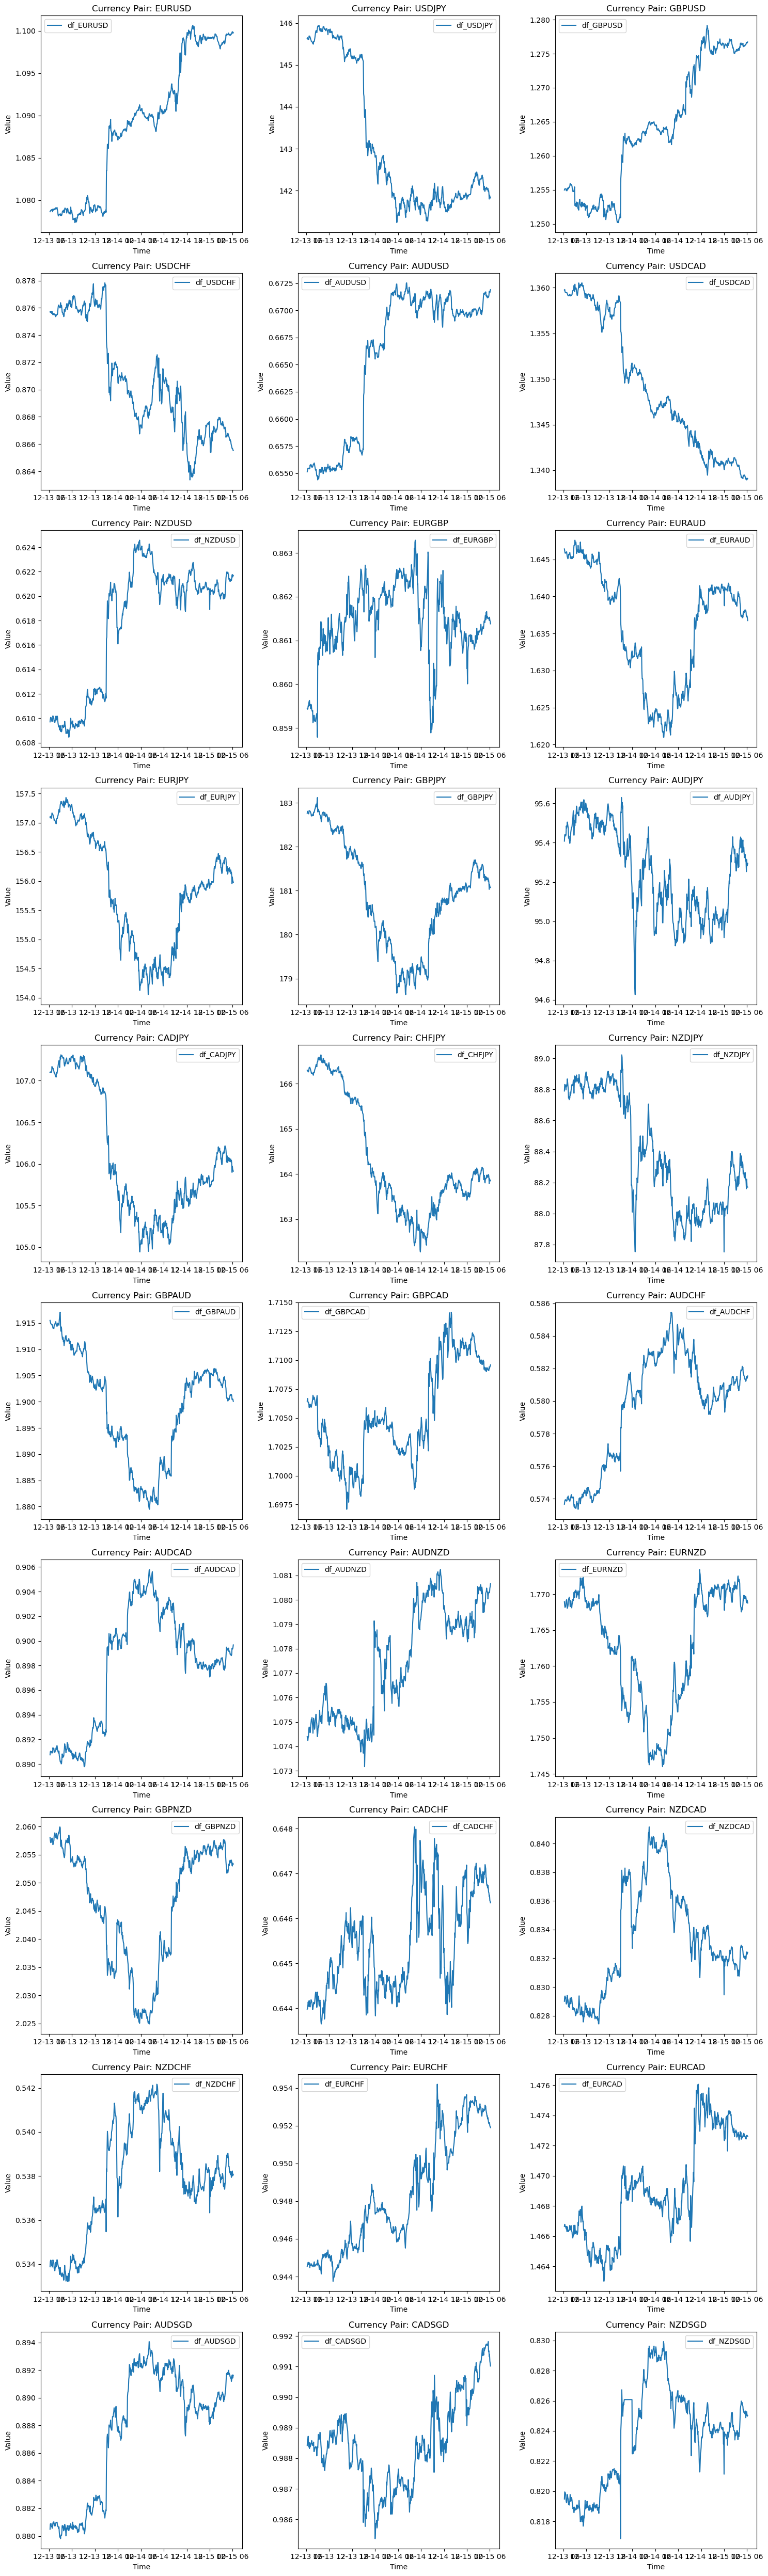

In [4]:
import MetaTrader5 as mt5
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from datetime import datetime
import datetime as dt
import pytz
import os
# Connect to MetaTrader 5 terminal
if not mt5.initialize():
    print("initialize() failed, error code =", mt5.last_error())
    quit()

# Define the currency pairs
currency_pairs = ['EURUSD', 'USDJPY', 'GBPUSD', 'USDCHF', 'AUDUSD', 'USDCAD', 'NZDUSD','EURGBP', 'EURAUD', 'EURJPY', 'GBPJPY', 'AUDJPY', 'CADJPY', 'CHFJPY',
        'NZDJPY', 'GBPAUD', 'GBPCAD', 'AUDCHF', 'AUDCAD', 'AUDNZD', 'EURNZD','GBPNZD', 'CADCHF', 'NZDCAD', 'NZDCHF', 'EURCHF', 'EURCAD', 'AUDSGD', 'CADSGD', 'CHFJPY', 'NZDSGD']    

dict_ = {}
for i in currency_pairs:
    # Initialize connection to the MetaTrader 5 terminal
    if not mt5.initialize():
        print("initialize() failed, error code =", mt5.last_error())
        quit()

    

 # Get historical price data for USD/JPY on a 30-minute timeframe
    symbol = i# Set the time zone to UTC
    timezone = pytz.timezone("Etc/UTC")

    # Define the date and time range for historical data
    hours_offset = dt.timedelta(hours=24*2)
    local_time = datetime.today()
    utc_from = local_time.astimezone(timezone)-hours_offset
    utc_to = local_time 
    timeframe = mt5.TIMEFRAME_M5
    rates = mt5.copy_rates_range(symbol, timeframe, utc_from, utc_to)
     # Check if data retrieval was successful
    if rates is not None and len(rates) > 0:
        # Create a DataFrame from the obtained data
        df = pd.DataFrame(rates)

        # Convert time in seconds to 'datetime' format
        df['time'] = pd.to_datetime(df['time'], unit='s')

        # Store the DataFrame in the dictionary
        dict_[f'df_{symbol}'] = df
    else:
        print(f"Failed to retrieve data for {symbol}")

    # Shut down the connection to the MetaTrader 5 terminal
    mt5.shutdown()
  
num_pairs = len(dict_)
cols = 3  # Number of columns in the grid
rows = -(-num_pairs // cols)  # Calculate number of rows needed

fig = plt.figure(figsize=(15, rows * 5))  # Adjust the figure height based on the number of pairs
gs = gridspec.GridSpec(rows, cols)

for i, (pair, data) in enumerate(dict_.items()):
    ax = plt.subplot(gs[i // cols, i % cols])  # Determine subplot position
    sns.lineplot(data=data, x='time', y='close', label=pair, ax=ax)
    ax.set_xlabel('Time')
    ax.set_ylabel('Value')
    ax.set_title(f'Currency Pair: {pair[3:]}')
    ax.legend()

plt.tight_layout()
folder_path = 'C:\\Users\\morara\\correlation\\'
file_name = 'Corrcomparison-Daily.jpg'  # Change the file format to your preference (.png, .jpg, .pdf, etc.)
plt.savefig(os.path.join(folder_path, file_name))  # Use os.path.join to combine folder_path and file_name
plt.show();


In [3]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os
import MetaTrader5 as mt5
import pandas as pd
from datetime import datetime
import datetime as dt
import pytz
# Connect to MetaTrader 5 terminal
if not mt5.initialize():
    print("initialize() failed, error code =", mt5.last_error())
    quit()

# Define the currency pairs
currency_pairs = ['EURUSD', 'USDJPY', 'GBPUSD', 'USDCHF', 'AUDUSD', 'USDCAD', 'NZDUSD','EURGBP', 'EURAUD', 'EURJPY', 'GBPJPY', 'AUDJPY', 'CADJPY', 'CHFJPY',
        'NZDJPY', 'GBPAUD', 'GBPCAD', 'AUDCHF', 'AUDCAD', 'AUDNZD', 'EURNZD','GBPNZD', 'CADCHF', 'NZDCAD', 'NZDCHF', 'EURCHF', 'EURCAD', 'AUDSGD', 'CADSGD', 'CHFJPY', 'NZDSGD']    

dict_ = {}
for i in currency_pairs:
    # Get historical price data for each currency pair on a 30-minute timeframe
    symbol = i
    timezone = pytz.timezone("Etc/UTC")

    hours_offset = dt.timedelta(hours=24*2)
    local_time = datetime.today()
    utc_from = local_time.astimezone(timezone)-hours_offset
    utc_to = datetime.now().astimezone(timezone)
    timeframe = mt5.TIMEFRAME_M5
    rates = mt5.copy_rates_range(symbol, timeframe, utc_from, utc_to)
    
    if rates is not None and len(rates) > 0:
        df = pd.DataFrame(rates)
        df['time'] = pd.to_datetime(df['time'], unit='s')
        dict_[f'df_{symbol}'] = df
    else:
        print(f"Failed to retrieve data for {symbol}")

# Shut down the connection to the MetaTrader 5 terminal
mt5.shutdown()

# Create a Plotly subplot figure
num_pairs = len(dict_)
cols = 3  # Number of columns in the grid
rows = -(-num_pairs // cols)  # Calculate number of rows needed

fig = make_subplots(rows=rows, cols=cols)

for i, (pair, data) in enumerate(dict_.items()):
    row = i // cols + 1  # Determine subplot row
    col = i % cols + 1  # Determine subplot column

    fig.add_trace(
        go.Scatter(x=data['time'], y=data['close'], mode='lines', name=pair),
        row=row, col=col
    )

    fig.update_xaxes(title_text='Time', row=row, col=col)
    fig.update_yaxes(title_text='Value', row=row, col=col)

fig.update_layout(
    title='Currency Pair Closing Values',
    showlegend=True,
    height=rows * 400,  # Adjust the figure height based on the number of pairs
    width=1000  # Modify the figure width as needed
)

folder_path = 'C:\\Users\\morara\\correlation\\'
file_name = 'Corrcomparison-Daily.html'  # Change the file format to your preference (.html, .png, .jpg, etc.)
file_path = os.path.join(folder_path, file_name)
fig.write_html(file_path)
fig.show()
